In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [3]:
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [4]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
netflix['director'].fillna('No_Director', inplace = True )
netflix['cast'].fillna('NO_Information', inplace = True)
netflix['country'].fillna('Country_Unavailable', inplace = True)
netflix['rating'].fillna('Rating_Unavailable', inplace = True)
netflix['date_added'].fillna('Unknown', inplace = True)

In [6]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

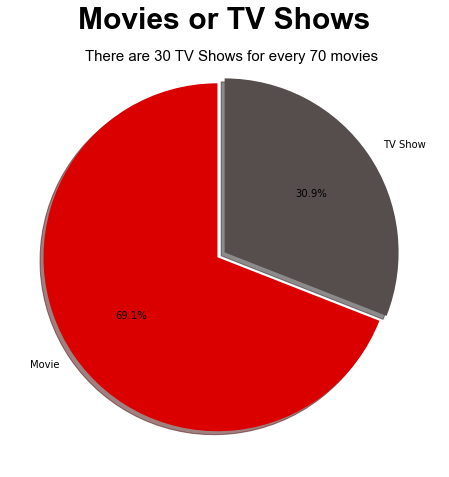

In [7]:
plt.figure(figsize=(20, 8))
values = netflix.type.value_counts()
labels = netflix['type'].value_counts().index
colors = ['#db0000', '#564d4d']
explode = [0.05, 0]
plt.pie(values, colors = colors, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90, shadow = True)
plt.title('Movies or TV Shows', fontfamily = 'Arial', fontsize = 30, fontweight = 'bold', loc = 'center')
plt.text(-0.8, 1.1, 'There are 30 TV Shows for every 70 movies', fontsize = 15, fontfamily = 'Arial')
plt.show()

In [8]:
values = netflix['country'].value_counts()[: 15]
index = netflix['country'].value_counts().index[: 15]
X = netflix['country'].value_counts().sort_values
X

<bound method Series.sort_values of United States                                          2555
India                                                   923
Country_Unavailable                                     507
United Kingdom                                          397
Japan                                                   226
                                                       ... 
Germany, United States, France                            1
United States, Italy, United Kingdom, Liechtenstein       1
Argentina, Brazil, France, Poland, Germany, Denmark       1
India, Nepal                                              1
United Kingdom, New Zealand                               1
Name: country, Length: 682, dtype: int64>

[Text(0, 0, 'United States'),
 Text(0, 1, 'India'),
 Text(0, 2, 'Country_Unavailable'),
 Text(0, 3, 'United Kingdom'),
 Text(0, 4, 'Japan'),
 Text(0, 5, 'South Korea'),
 Text(0, 6, 'Canada'),
 Text(0, 7, 'Spain'),
 Text(0, 8, 'France'),
 Text(0, 9, 'Egypt'),
 Text(0, 10, 'Turkey'),
 Text(0, 11, 'Mexico'),
 Text(0, 12, 'Australia'),
 Text(0, 13, 'Taiwan'),
 Text(0, 14, 'Brazil')]

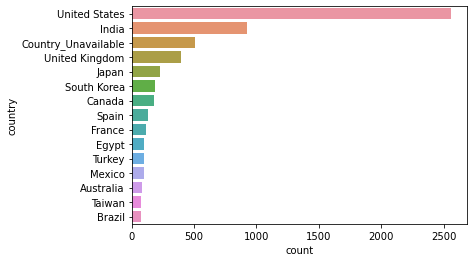

In [9]:
ax = sns.countplot(y = 'country', data = netflix, order = netflix['country'].value_counts().index[: 15])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

[Text(0, 0, 'NO_Information'),
 Text(0, 1, 'David Attenborough'),
 Text(0, 2, 'Samuel West'),
 Text(0, 3, 'Jeff Dunham'),
 Text(0, 4, 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath'),
 Text(0, 5, 'Craig Sechler'),
 Text(0, 6, 'Kevin Hart'),
 Text(0, 7, 'Bill Burr'),
 Text(0, 8, 'Iliza Shlesinger'),
 Text(0, 9, 'Jim Gaffigan'),
 Text(0, 10, 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep'),
 Text(0, 11, 'Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson'),
 Text(0, 12, 'Vir Das'),
 Text(0, 13, 'Jim Jefferies'),
 Text(0, 14, 'Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal')]

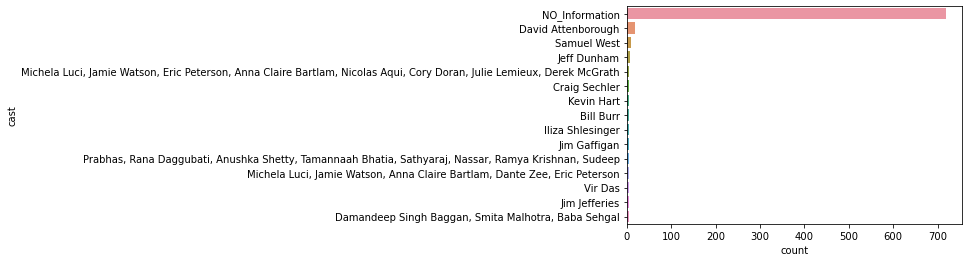

In [10]:
ax = sns.countplot(y = 'cast', data = netflix, order = netflix['cast'].value_counts().index[: 15])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

[Text(0, 0, ' International Movies'),
 Text(0, 1, 'Dramas'),
 Text(0, 2, 'Comedies'),
 Text(0, 3, 'Documentaries'),
 Text(0, 4, ' Dramas'),
 Text(0, 5, 'Action & Adventure'),
 Text(0, 6, 'International TV Shows'),
 Text(0, 7, ' Independent Movies'),
 Text(0, 8, ' TV Dramas'),
 Text(0, 9, ' Romantic Movies'),
 Text(0, 10, ' International TV Shows'),
 Text(0, 11, 'Children & Family Movies'),
 Text(0, 12, ' Thrillers'),
 Text(0, 13, ' TV Comedies'),
 Text(0, 14, ' Comedies'),
 Text(0, 15, 'Crime TV Shows'),
 Text(0, 16, "Kids' TV"),
 Text(0, 17, 'Stand-Up Comedy'),
 Text(0, 18, ' Romantic TV Shows'),
 Text(0, 19, ' Music & Musicals')]

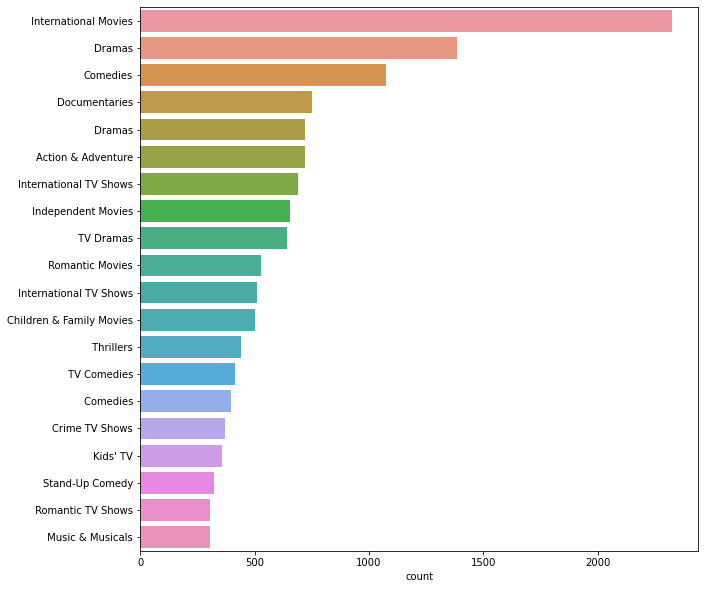

In [11]:
genres = netflix['listed_in'].str.split(',', expand = True).stack().reset_index(level = 1, drop = True)
plt.figure(figsize = (10, 10))
ax = sns.countplot(y = genres, order = genres.value_counts().index[:20])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

[Text(0, 0, ' Anupam Kher'),
 Text(0, 1, ' Takahiro Sakurai'),
 Text(0, 2, ' Om Puri'),
 Text(0, 3, 'Shah Rukh Khan'),
 Text(0, 4, ' Boman Irani'),
 Text(0, 5, ' Paresh Rawal'),
 Text(0, 6, ' Andrea Libman'),
 Text(0, 7, ' Yuki Kaji'),
 Text(0, 8, 'Akshay Kumar'),
 Text(0, 9, ' Vincent Tong')]

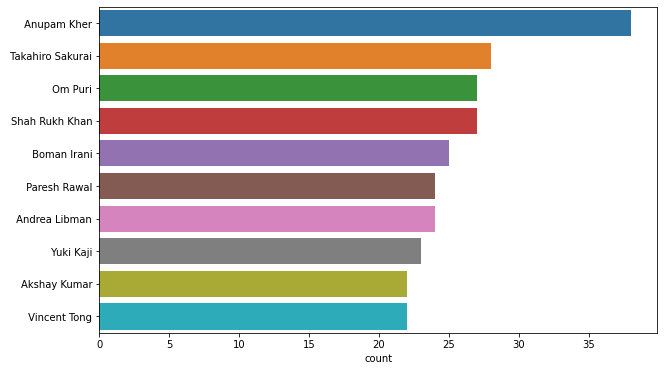

In [12]:
cast = netflix['cast'].str.split(',', expand = True).stack().reset_index(level = 1, drop = True)
cast = cast[cast != 'NO_Information']
plt.figure(figsize = (10, 6))
ax = sns.countplot(y = cast, order = cast.value_counts().index[:10])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

[Text(0, 0, 'TV-MA'),
 Text(1, 0, 'TV-14'),
 Text(2, 0, 'TV-PG'),
 Text(3, 0, 'R'),
 Text(4, 0, 'PG-13'),
 Text(5, 0, 'TV-Y'),
 Text(6, 0, 'TV-Y7'),
 Text(7, 0, 'PG'),
 Text(8, 0, 'TV-G'),
 Text(9, 0, 'NR'),
 Text(10, 0, 'G'),
 Text(11, 0, 'TV-Y7-FV'),
 Text(12, 0, 'UR'),
 Text(13, 0, 'NC-17')]

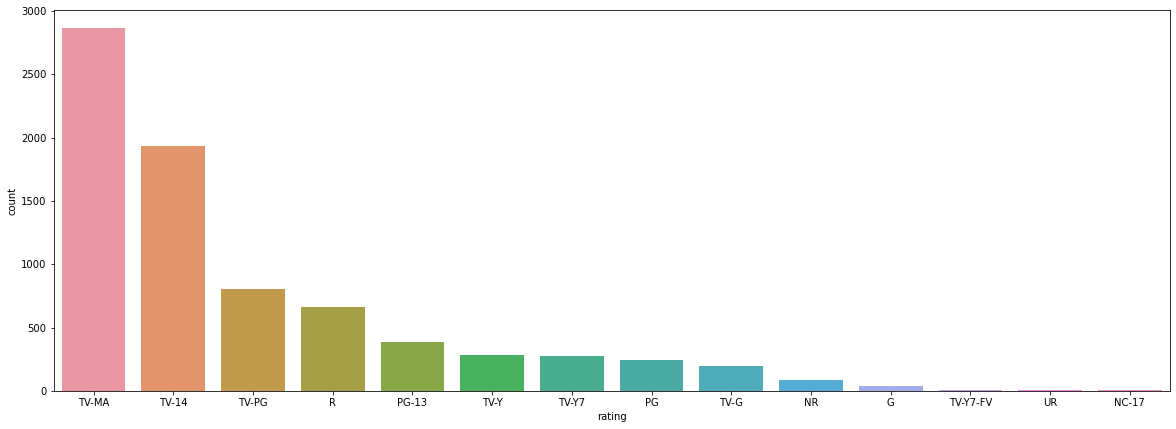

In [13]:
plt.figure(figsize = (20, 7))
ax = sns.countplot(x = 'rating', data = netflix, order =netflix[netflix['rating'] != 'Rating_Unavailable']['rating'].value_counts().index[: 15])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

In [14]:
netflix.groupby('release_year')['type'].value_counts()[:10]

release_year  type   
1925          TV Show    1
1942          Movie      2
1943          Movie      3
1944          Movie      3
1945          Movie      3
1946          Movie      1
              TV Show    1
1947          Movie      1
1954          Movie      2
1955          Movie      3
Name: type, dtype: int64

In [15]:
country = netflix['country'].value_counts().sort_values(ascending = False)
country = country[country != 'Country_Unavailable']
topCountry = country.head(10)

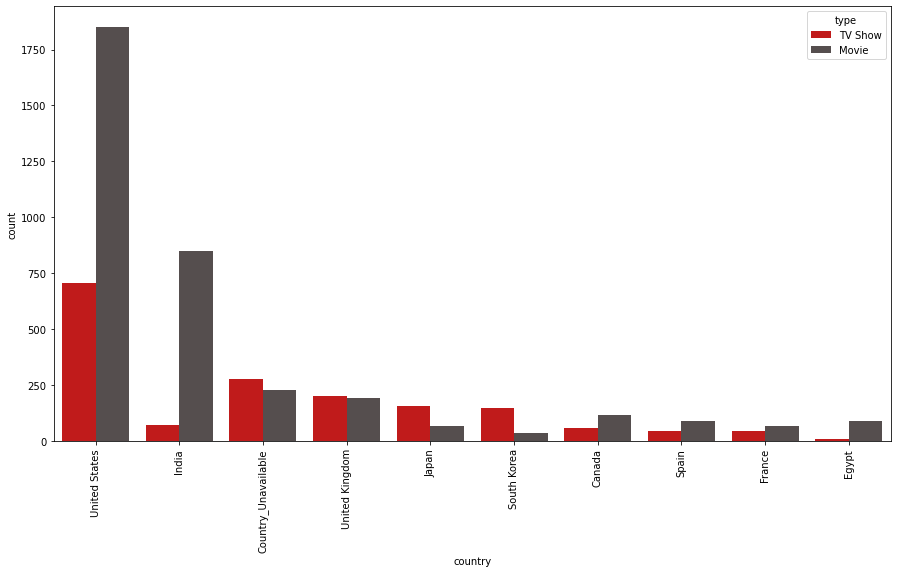

In [16]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'country', hue = 'type', order = topCountry.index, data = netflix, palette = ['#db0000', '#564d4d'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

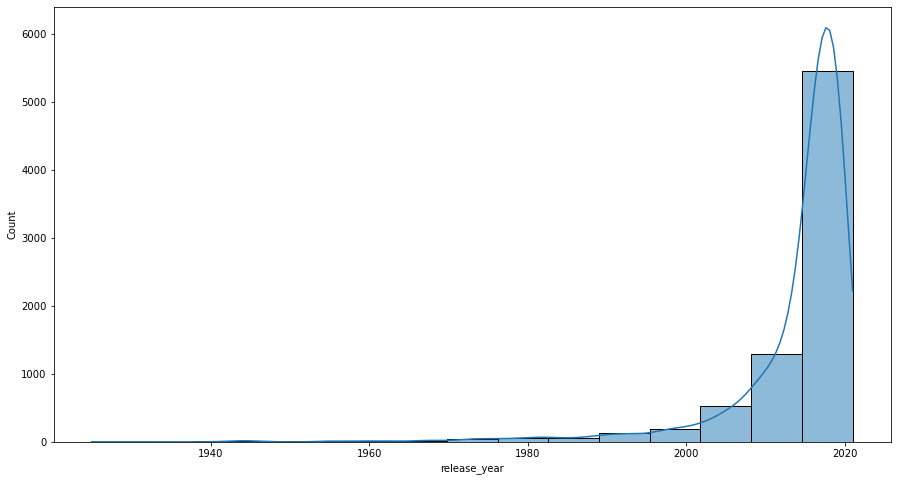

In [17]:
plt.figure(figsize = (15,  8))
sns.histplot(netflix['release_year'], bins = 15, kde = True)
plt.show()

In [18]:
release_year = netflix['release_year'].unique()

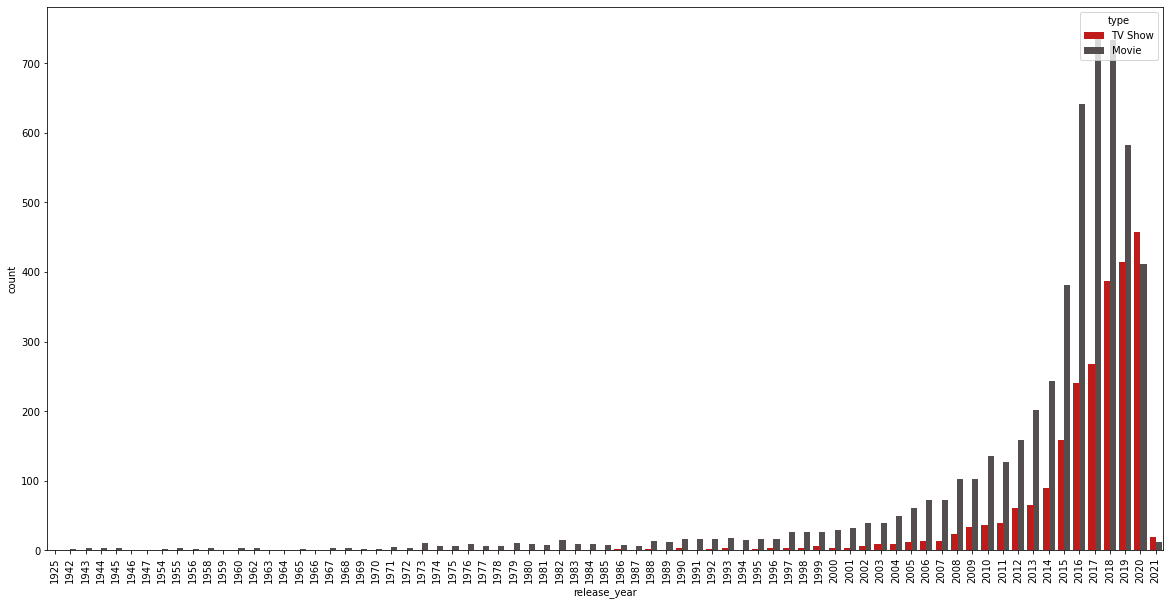

In [19]:
plt.figure(figsize = (20, 10))
ax = sns.countplot(x = 'release_year', hue = 'type', data = netflix, palette = ['#db0000', '#564d4d'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

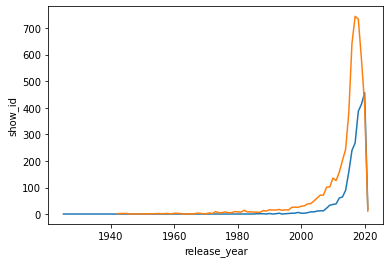

In [20]:
netflix_TV = netflix[netflix['type'] == 'TV Show'].groupby('release_year').count()
netflix_movies = netflix[netflix['type'] == 'Movie'].groupby('release_year').count()
sns.lineplot(data = netflix_TV['show_id'], sizes = 10)
sns.lineplot(data = netflix_movies['show_id'])
plt.show()

In [25]:
netflix_Trends = netflix['type'].groupby(netflix['release_year']).count().sort_values(ascending = False)[: 10]
netflix_Trends

release_year
2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
Name: type, dtype: int64

[Text(0, 0, '2018'),
 Text(1, 0, '2017'),
 Text(2, 0, '2019'),
 Text(3, 0, '2016'),
 Text(4, 0, '2020'),
 Text(5, 0, '2015'),
 Text(6, 0, '2014'),
 Text(7, 0, '2013'),
 Text(8, 0, '2012'),
 Text(9, 0, '2010')]

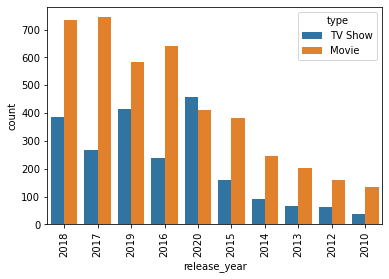

In [26]:
ax = sns.countplot(x = netflix['release_year'], hue = 'type', data = netflix, order = netflix_Trends.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)